# RTMA Data Demo

This notebook demonstrates how to load and explore the ingested RTMA weather data.

## Loading the Dataset

In [1]:
import arraylake as al
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
group = 'test-ingestion-cooperative-write'

client = al.Client()
# client.login() # Only needed for private repos
repo = client.get_repo('earthmover/rtma')

In [3]:
session = repo.readonly_session('main')

In [4]:
ds = xr.open_zarr(session.store, group=group)
ds

<xarray.Dataset> Size: 162GB
Dimensions:    (time: 2160, step: 1, y: 1597, x: 2345)
Coordinates:
  * time       (time) datetime64[ns] 17kB 2025-01-01 ... 2025-03-31T23:00:00
  * step       (step) timedelta64[ns] 8B 00:00:00
    latitude   (y, x) float64 30MB dask.array<chunksize=(200, 587), meta=np.ndarray>
    longitude  (y, x) float64 30MB dask.array<chunksize=(200, 587), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    i10fg      (time, step, y, x) float32 32GB dask.array<chunksize=(1, 1, 400, 600), meta=np.ndarray>
    si10       (time, step, y, x) float32 32GB dask.array<chunksize=(1, 1, 400, 600), meta=np.ndarray>
    u10        (time, step, y, x) float32 32GB dask.array<chunksize=(1, 1, 400, 600), meta=np.ndarray>
    wdir10     (time, step, y, x) float32 32GB dask.array<chunksize=(1, 1, 400, 600), meta=np.ndarray>
    v10        (time, step, y, x) float32 32GB dask.array<chunksize=(1, 1, 400, 600), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

## Exploring the Data

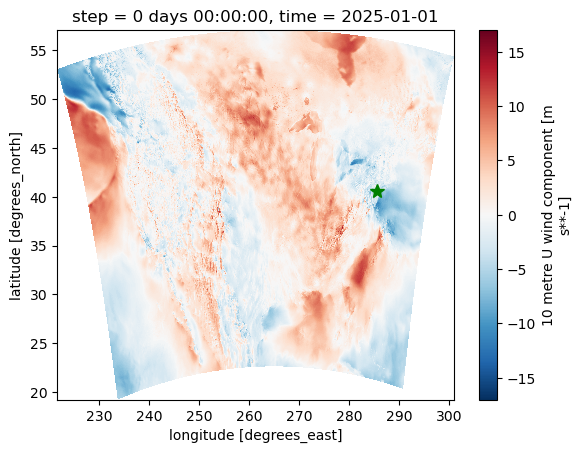

In [5]:
# Single time step map
p = ds.u10.isel(time=0).plot(x='longitude', y='latitude')

timeseries = ds.isel(x=2000, y=850) # pick a location roughly around NYC
ax = p.axes.plot(timeseries.longitude, timeseries.latitude, marker='*', markersize=10, color='g')

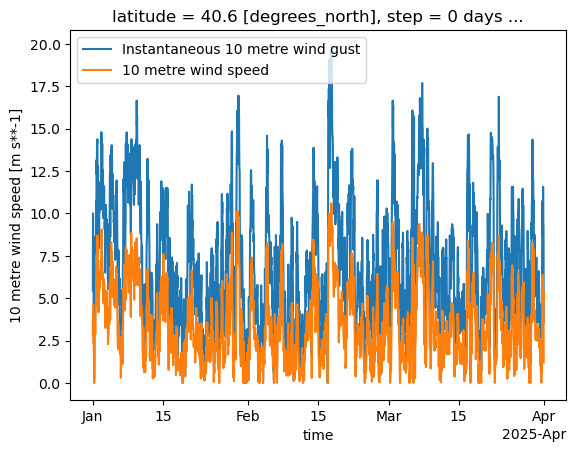

In [6]:
# Plot timeseries of gusts a and windspeed at example location
for variable in ['i10fg', 'si10']:
    timeseries[variable].plot(label=timeseries[variable].attrs['long_name'])
plt.legend()

## Temporal Aggregation

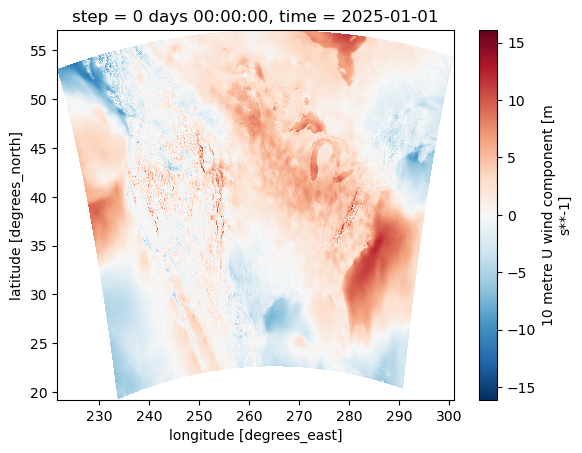

In [7]:
# Aggregate daily mean
daily = ds.resample(time='1D').mean()
daily_timeseries = daily.isel(x=2000, y=850) # pick a location roughly around NYC
daily.u10.isel(time=0).plot(x='longitude', y='latitude')

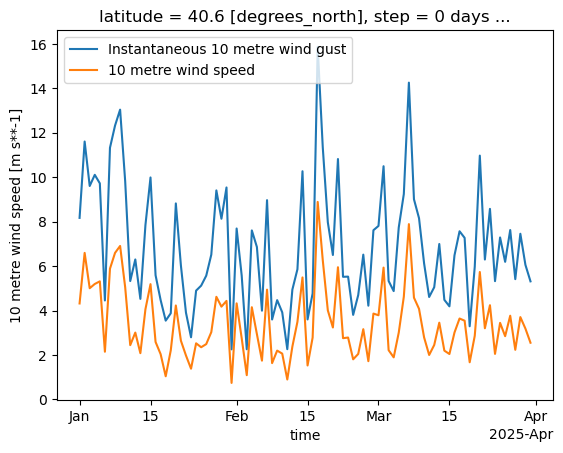

In [8]:
# Plot daily average timeseries of gusts a and windspeed at example location
for variable in ['i10fg', 'si10']:
    daily_timeseries[variable].plot(label=daily_timeseries[variable].attrs['long_name'])
plt.legend()